# Profitability Analysis

In [2]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

# Set styles
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# === Load Cleaned Global Superstore Data ===
file_path = "/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/StoreSight/0_data/cleaned_data.csv"
profit_data = pd.read_csv(file_path)

# === Preview Dataset ===
print("✅ Data loaded successfully.")
print("📐 Shape:", profit_data.shape)
print("\n🧱 Columns:\n", profit_data.columns.tolist())

# === Check Key Numeric Columns ===
key_columns = ['Sales', 'Profit', 'Profit_Margin', 'Quantity', 'Discount', 'Shipping_Cost']
print("\n📊 Summary of Key Metrics:")
display(profit_data[key_columns].describe())

# === Quick Sample ===
print("\n🔎 Sample Data:")
display(profit_data.head())

✅ Data loaded successfully.
📐 Shape: (51290, 28)

🧱 Columns:
 ['Unnamed: 0', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned', 'Shipping_Delay_Days', 'Profit_Margin', 'Total_Order_Value', 'Is_Returned']

📊 Summary of Key Metrics:


,Sales,Profit,Profit_Margin,Quantity,Discount,Shipping_Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,28.610982,4.743048,3.476545,0.142908,26.478567
std,487.565361,174.340972,46.566723,2.278766,0.212280,57.251373
min,0.444000,-6599.978000,-473.350000,1.000000,0.000000,1.002000
25%,30.758625,0.000000,0.000000,2.000000,0.000000,2.610000
50%,85.053000,9.240000,16.920000,3.000000,0.000000,7.790000
75%,251.053200,36.810000,33.310000,5.000000,0.200000,24.450000
max,22638.480000,8399.976000,50.000000,14.000000,0.850000,933.570000



🔎 Sample Data:


,Unnamed: 0,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Shipping_Delay_Days,Profit_Margin,Total_Order_Value,Is_Returned
0,0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,2,0.0,62.1544,40.77,High,Unknown,2,28.00,262.75,0
1,1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,9,0.1,-288.7650,923.63,Critical,Unknown,2,-7.78,4633.02,0
2,2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,9,0.1,919.9710,915.49,Medium,Unknown,1,17.78,6090.66,0
3,3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,5,0.1,-96.5400,910.16,Medium,Unknown,2,-3.34,3802.67,0
4,4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,8,0.0,311.5200,903.04,Critical,Unknown,1,11.00,3736.00,0


---

### Global Profitability Overview

Objective:

Provide a high-level profitability summary for the entire dataset, including:
- Total Profit and Total Sales
- Profit Margin (overall)
- Average Profit per Order
- Contribution Margin (considering both sales and shipping costs)

Metrics & Visualizations:
- Total Profit, Total Sales, Overall Profit Margin
- Average Profit per Order
- Contribution Margin = (Profit + Shipping Cost) / Sales
- Pie chart or Bar chart to visualize total profits vs costs

📊 Global Profitability Overview:
Total Sales: $12,642,501.91
Total Profit: $1,467,457.29
Overall Profit Margin: 11.61%
Average Profit per Order: $28.61
Average Contribution Margin: 17.04%


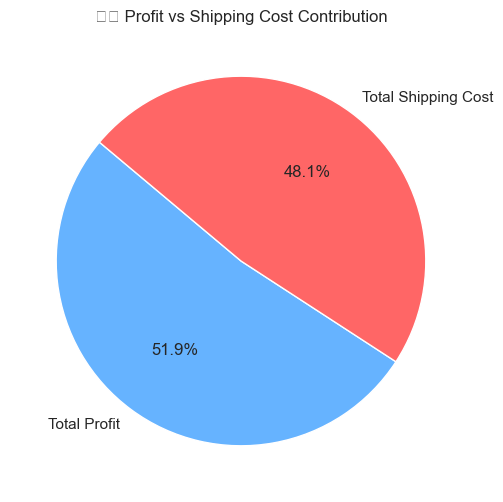

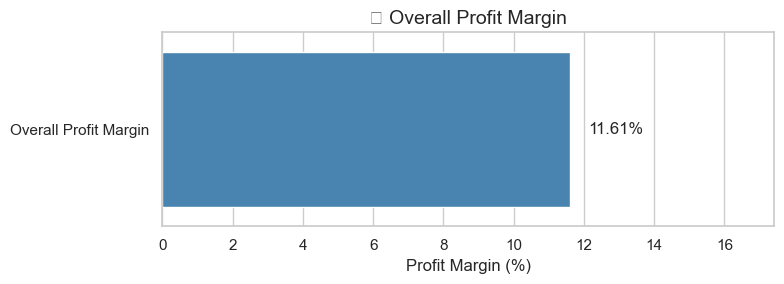

In [3]:
# === Step 1: Global Profit Overview ===
total_sales = profit_data['Sales'].sum()
total_profit = profit_data['Profit'].sum()

# Calculate overall profit margin
profit_margin = total_profit / total_sales

# Average profit per order
avg_profit_per_order = profit_data['Profit'].mean()

# Calculate Contribution Margin (Profit + Shipping Cost) / Sales
profit_data['Contribution_Margin'] = (profit_data['Profit'] + profit_data['Shipping_Cost']) / profit_data['Sales']
avg_contribution_margin = profit_data['Contribution_Margin'].mean()

# === Step 2: Print Key Metrics ===
print(f"📊 Global Profitability Overview:")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {profit_margin * 100:.2f}%")
print(f"Average Profit per Order: ${avg_profit_per_order:,.2f}")
print(f"Average Contribution Margin: {avg_contribution_margin * 100:.2f}%")

# === Step 3: Visualizations ===
# Pie chart of Total Profit vs Total Shipping Cost
labels = ['Total Profit', 'Total Shipping Cost']
sizes = [total_profit, profit_data['Shipping_Cost'].sum()]
colors = ['#66b3ff', '#ff6666']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('🛠️ Profit vs Shipping Cost Contribution')
plt.show()

# Convert profit margin to percentage for readability
profit_margin_percent = profit_margin * 100

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(x=[profit_margin_percent], y=['Overall Profit Margin'], palette='Blues_d')

# Add label on the bar
plt.text(profit_margin_percent + 0.5, 0, f"{profit_margin_percent:.2f}%", va='center', fontsize=12)

plt.title("📉 Overall Profit Margin", fontsize=14)
plt.xlabel("Profit Margin (%)")
plt.xlim(0, max(profit_margin_percent * 1.5, 10))  # auto scale the axis
plt.tight_layout()
plt.show()

In [4]:
from scipy.stats import pearsonr
corr, _ = pearsonr(profit_data['Shipping_Cost'], profit_data['Profit_Margin'])
print(f"Correlation between Shipping Cost and Profit Margin: {corr:.2f}")

Correlation between Shipping Cost and Profit Margin: 0.07


 📦 Shipping Cost vs Profitability – Summary

🧾 Key Findings:
- **Total Profit** accounts for **51.9%** of total margin sources.
- **Shipping Costs** consume a significant **48.1%**, nearly half the profitability potential.
- The **overall Profit Margin is 11.61%**, indicating modest profitability.
- The **correlation between Shipping Cost and Profit Margin is weak (0.07)** — meaning shipping costs do **not directly scale with profitability**.

⚠️ Interpretation:
- While shipping costs don’t statistically correlate with profit margins across all orders, they still represent a **major expense**, especially considering the slim overall margin. Therefore, even minor inefficiencies in logistics can significantly impact profitability.

✅ Recommendations:
- **Optimize shipping operations** in high-cost regions or categories.
- **Encourage bulk or high-value orders** to reduce shipping as a % of sales.
- **Introduce free shipping thresholds** to increase Average Order Value (AOV).
- **Negotiate better courier contracts** or explore third-party fulfillment (3PL) options.

---

#### Profitability by Category and Sub-Category

Objective:

- Category (Furniture, Office Supplies, Technology)
- Sub-Category (e.g., Chairs, Phones, Binders)

This reveals which product areas drive profitability, and which are loss leaders.

 We’ll Do:
1.	Calculate aggregated sales, profit, and profit margin for:
- Each Category
- Each Sub-Category
2.	Visualize:
- 📊 Bar plot: Profit Margin by Category
- 📊 Horizontal bar plot: Profit Margin by Sub-Category (sorted)
- 📊 Heatmap: Category vs Profitability

📊 Category-Level Profitability:


,Sales,Profit,Profit_Margin
Category,,,
Technology,4.744557e+06,663778.73318,0.139903
Office Supplies,3.787493e+06,518595.82790,0.136923
Furniture,4.110452e+06,285082.73020,0.069356


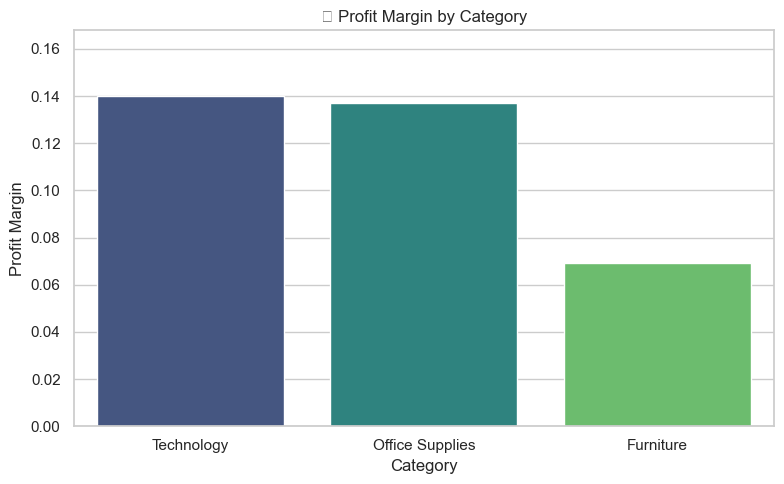

📊 Sub-Category-Level Profitability (Sorted):


,Sales,Profit,Profit_Margin
Sub-Category,,,
Paper,2.417875e+05,58111.65350,0.240342
Labels,7.335028e+04,14988.92370,0.204347
Accessories,7.492370e+05,129626.30620,0.173011
Copiers,1.509436e+06,258567.54818,0.171301
Envelopes,1.692175e+05,28849.48730,0.170488
Binders,4.618694e+05,72433.15160,0.156826
Art,3.716132e+05,57829.85930,0.155618
Fasteners,8.949505e+04,13844.28890,0.154693
Appliances,1.010536e+06,141562.58770,0.140087


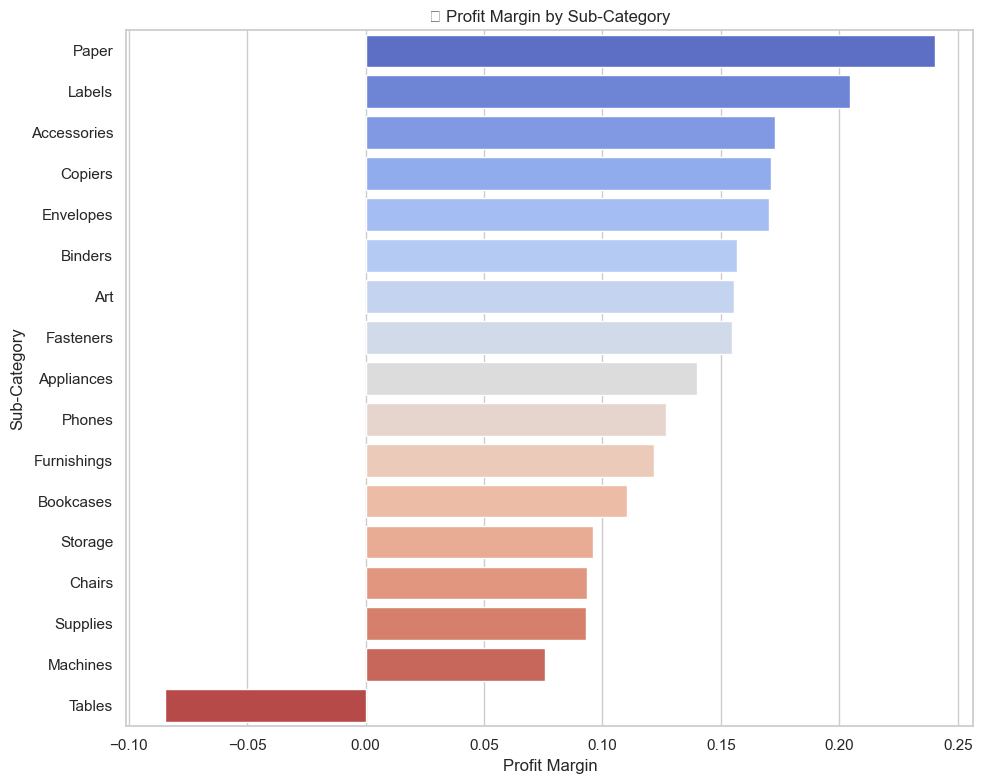

In [5]:
# === Step 1: Category-Level Profitability ===
category_profit = (
    profit_data.groupby('Category')[['Sales', 'Profit']]
    .sum()
    .assign(Profit_Margin=lambda x: x['Profit'] / x['Sales'])
    .sort_values(by='Profit_Margin', ascending=False)
)

print("📊 Category-Level Profitability:")
display(category_profit)

# === Step 2: Bar Plot - Profit Margin by Category ===
plt.figure(figsize=(8, 5))
sns.barplot(x=category_profit.index, y=category_profit['Profit_Margin'], palette='viridis')
plt.title("💡 Profit Margin by Category")
plt.ylabel("Profit Margin")
plt.xlabel("Category")
plt.ylim(0, category_profit['Profit_Margin'].max() * 1.2)
plt.tight_layout()
plt.show()

# === Step 3: Sub-Category-Level Profitability ===
subcategory_profit = (
    profit_data.groupby('Sub-Category')[['Sales', 'Profit']]
    .sum()
    .assign(Profit_Margin=lambda x: x['Profit'] / x['Sales'])
    .sort_values(by='Profit_Margin', ascending=False)
)

print("📊 Sub-Category-Level Profitability (Sorted):")
display(subcategory_profit)

# === Step 4: Horizontal Bar Plot - Sub-Category Profitability ===
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit_Margin', y=subcategory_profit.index, data=subcategory_profit, palette='coolwarm')
plt.title("📦 Profit Margin by Sub-Category")
plt.xlabel("Profit Margin")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

## Report : Profitability by Category and Sub-Category

### 🧾 Category-Level Insights:

| Category         | Profit Margin  |
|------------------|----------------|
| Technology       | **13.99%**     |
| Office Supplies  | **13.69%**     |
| Furniture        | **6.93%**      |

- **Technology** is the most profitable category, with the highest overall margin.
- **Furniture** has **significantly lower margins**, almost half that of Technology.
- Despite high sales, Furniture’s low profitability may indicate **cost issues or discount leakage**.



### 🔎 Sub-Category-Level Observations:

#### 🔝 Top 5 Most Profitable Sub-Categories:
| Sub-Category | Profit Margin  |
|--------------|----------------|
| Paper        | **24.03%**     |
| Labels       | **20.43%**     |
| Accessories  | **17.30%**     |
| Copiers      | **17.13%**     |
| Envelopes    | **17.05%**     |

- **Paper and Labels** are highly profitable — possibly due to low return rates, high markup, or bulk orders.
- **Copiers and Accessories** offer strong contribution to bottom line — ideal for **scaling and promoting**.

#### 🔻 Lowest Performing Sub-Categories:
| Sub-Category | Profit Margin  |
|--------------|----------------|
| Machines     | 7.56%          |
| Tables       | **-8.46%**     |
| Supplies     | 9.29%          |
| Chairs       | 9.34%          |

- **Tables are losing money** — a **negative profit margin** suggests they're sold at a loss.
- **Chairs, Machines, and Supplies** have marginal profitability and may require pricing review or cost reduction.



### ✅ Recommendations:

- 🚀 **Scale top performers**: Focus marketing, bundling, and inventory on **Paper**, **Copiers**, **Accessories**.
- ⚠️ **Investigate loss leaders**: Analyze cost structure, returns, or discounting practices for **Tables**.
- 💼 **Revisit pricing/costing** in **Furniture**, especially large items like **Chairs and Bookcases**.
- 🛍️ Consider **bundling low-margin products** with high-margin ones to offset profitability gaps.

---

### Profitability by Segment and Region

Objective:

Evaluate how customer segments and geographic regions contribute to profitability.
This helps identify:
- High-margin customer types
- Underperforming regions that may need intervention
- Regional profit centers for strategic scaling

Breakdown

We’ll cover:
1.	📊 Segment-Level Analysis
2.	📊 Region-Level Analysis
3.	🔥 Heatmap: Segment vs Region → Profit Margin

📊 Profitability by Segment:


,Sales,Profit,Profit_Margin
Segment,,,
Home Office,2.309855e+06,277009.18056,0.119925
Corporate,3.824698e+06,441208.32866,0.115358
Consumer,6.507949e+06,749239.78206,0.115127


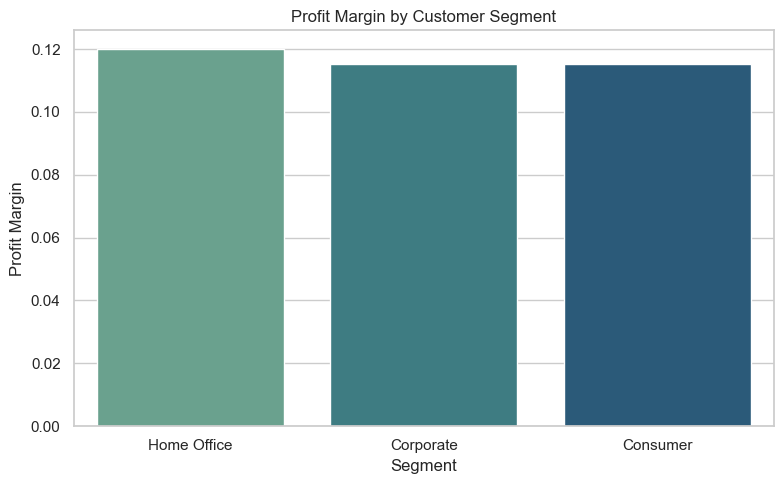

🌍 Profitability by Region:


,Sales,Profit,Profit_Margin
Region,,,
Canada,6.692817e+04,17817.39000,0.266217
Eastern Europe,3.100334e+05,77084.88000,0.248634
North Africa,2.332166e+05,57836.25000,0.247994
Central Africa,1.436300e+05,35383.71000,0.246353
Southern Africa,1.051918e+05,24158.55000,0.229662
Eastern Asia,8.550594e+05,167101.85100,0.195427
Southern Asia,8.665727e+05,159336.42700,0.183870
Eastern Africa,1.278560e+05,21900.90900,0.171294
Western US,7.254578e+05,108418.44890,0.149448


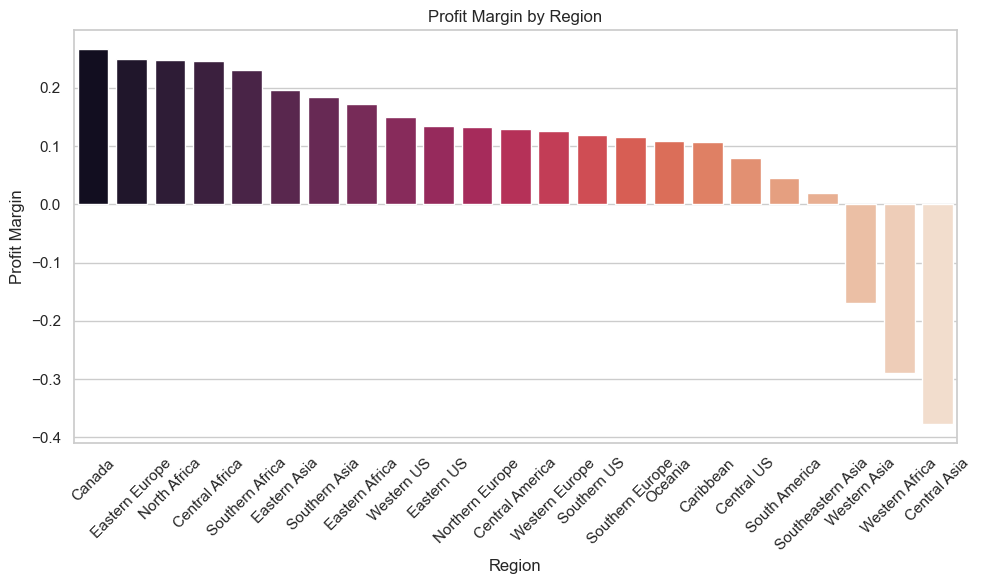

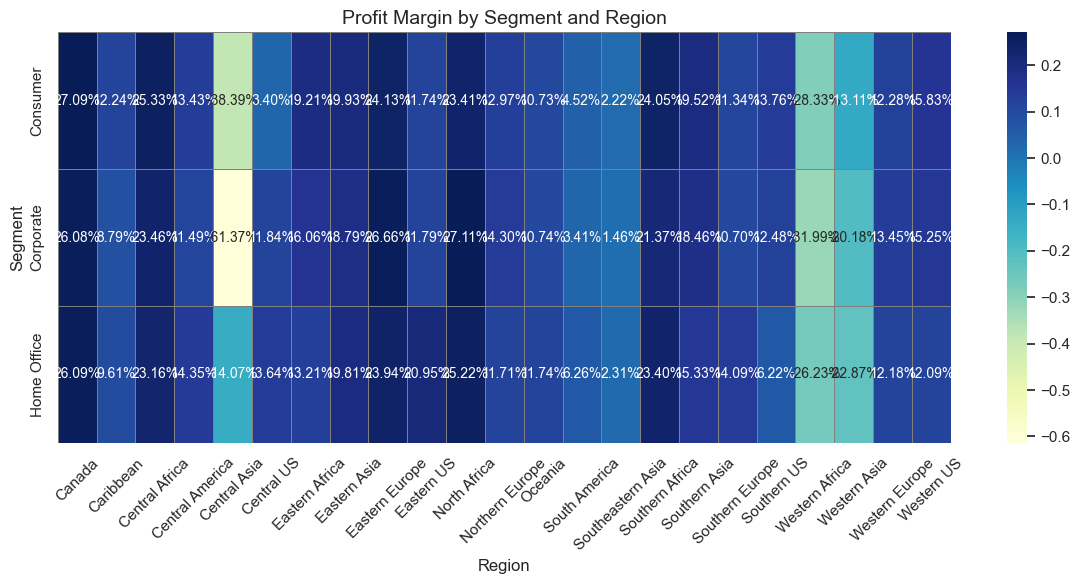

In [6]:
# === 1. Segment-Level Profitability ===
segment_profit = (
    profit_data.groupby('Segment')[['Sales', 'Profit']]
    .sum()
    .assign(Profit_Margin=lambda x: x['Profit'] / x['Sales'])
    .sort_values(by='Profit_Margin', ascending=False)
)

print("📊 Profitability by Segment:")
display(segment_profit)

# 📈 Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_profit.index, y=segment_profit['Profit_Margin'], palette='crest')
plt.title("Profit Margin by Customer Segment")
plt.ylabel("Profit Margin")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

# === 2. Region-Level Profitability ===
region_profit = (
    profit_data.groupby('Region')[['Sales', 'Profit']]
    .sum()
    .assign(Profit_Margin=lambda x: x['Profit'] / x['Sales'])
    .sort_values(by='Profit_Margin', ascending=False)
)

print("🌍 Profitability by Region:")
display(region_profit)

# 📈 Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=region_profit.index, y=region_profit['Profit_Margin'], palette='rocket')
plt.title("Profit Margin by Region")
plt.ylabel("Profit Margin")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Profit Margin Heatmap by Segment and Region (with readable % annotations) ===

# Step 1: Create pivot table
pivot_heatmap = (
    profit_data.groupby(['Segment', 'Region'])[['Sales', 'Profit']]
    .sum()
    .assign(Profit_Margin=lambda x: x['Profit'] / x['Sales'])
    .reset_index()
    .pivot(index='Segment', columns='Region', values='Profit_Margin')
)

# Step 2: Format values as % strings for annotation
annot_labels = pivot_heatmap.applymap(lambda x: f"{x * 100:.2f}%")

# Step 3: Plot heatmap with adjusted font size
plt.figure(figsize=(12, 6))  # Wider figure to give room
sns.heatmap(
    pivot_heatmap,
    annot=annot_labels,
    fmt="",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"fontsize": 10}  # Smaller annotation font
)
plt.title("Profit Margin by Segment and Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Segment", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🌐 Profitability by Segment and Region

### 🧾 Segment-Level Insights:

| Segment       | Profit Margin  |
|---------------|----------------|
| Home Office   | **11.99%**     |
| Corporate     | **11.54%**     |
| Consumer      | **11.51%**     |

- All segments have **similar margins**, with **Home Office** slightly ahead.
- **Consumer segment**, despite having the **highest sales volume**, has the **lowest relative profit margin**, suggesting:
  - More discounting
  - Higher return rates
  - Higher logistics costs per order



### 🌍 Region-Level Insights:

#### 🔝 Top 5 Most Profitable Regions (by Margin):
| Region           | Profit Margin  |
|------------------|----------------|
| Canada           | **26.62%**     |
| Eastern Europe   | 24.86%         |
| North Africa     | 24.80%         |
| Central Africa   | 24.63%         |
| Southern Africa  | 22.97%         |

- These regions show **strong margin performance**, though their total sales volumes are relatively lower.
- Represents an opportunity to **scale in high-margin regions** via increased marketing and localized promotions.

#### 🔻 Bottom 5 Regions (By Margin):

| Region            | Profit Margin |
|-------------------|----------------|
| South America     | 4.55%          |
| Southeastern Asia | 2.02%          |
| Western Asia      | -17.00% ❗      |
| Western Africa    | -28.99% ❗      |
| Central Asia      | -37.71% ❗      |

- These regions are **underperforming or operating at a loss**.
- Negative margins suggest issues like:
  - Excessive discounts
  - High shipping or import costs
  - Product-market misfit
  - Currency, tax, or regional operational losses



### 🔥 Heatmap Insights:

- The **Segment × Region heatmap** confirms that:
  - **Consumer sales in Western/Central Asia are deeply unprofitable**.
  - **Home Office and Corporate perform better in most regions**.
  - There is room to **optimize segment focus by geography**.



### ✅ Strategic Recommendations:

1. **Scale High-Margin Regions**:
   - Focus on **Canada, Eastern Europe, and North/Central Africa**.
   - Leverage strong profitability with localized campaigns.

2. **Fix or Exit Loss-Making Regions**:
   - Audit pricing, operations, and logistics in **Western & Central Asia**, and **Western Africa**.
   - If margins can’t be recovered, consider **scaling back presence** or switching product focus.

3. **Segment Strategy**:
   - **Increase targeting of Home Office customers**, especially in profitable regions.
   - **Investigate margin dilution in the Consumer segment**, especially where volume is high but profit is low.

4. **Product-Region Alignment**:
   - Analyze if certain products underperform in specific regions.
   - **Localize assortments** to match regional preferences and margin realities.

---

## Profit vs Discount Analysis

Objective:

Understand how discounts impact profit and profit margin:
- Do higher discounts lead to higher sales and profit?
- Or do discounts reduce profit below acceptable levels?
- Where is the optimal discount range?


Steps We’ll Follow:
1.	Create discount bins (e.g., 0–10%, 10–20%, …)
2.	For each bin, calculate:
- Average Sales
- Average Profit
- Average Profit Margin
- Order Count
	3.	Visualize:
- 📈 Discount vs. Profit Margin
- 📊 Discount vs. Avg Profit
- 📊 Count of Orders by Discount Range

📊 Discount Impact Summary:


,Discount_Bin,Avg_Sales,Avg_Profit,Avg_Profit_Margin,Order_Count
0,0-10%,265.822542,62.600467,25.189825,33688
1,10-20%,280.086282,27.614734,13.745043,6274
2,20-30%,395.609813,-21.877573,-3.851210,967
3,30-40%,206.277389,-48.857485,-24.595418,3400
4,40-50%,170.200181,-77.027382,-45.006422,2789
5,50%+,89.075902,-98.893015,-114.738454,4172


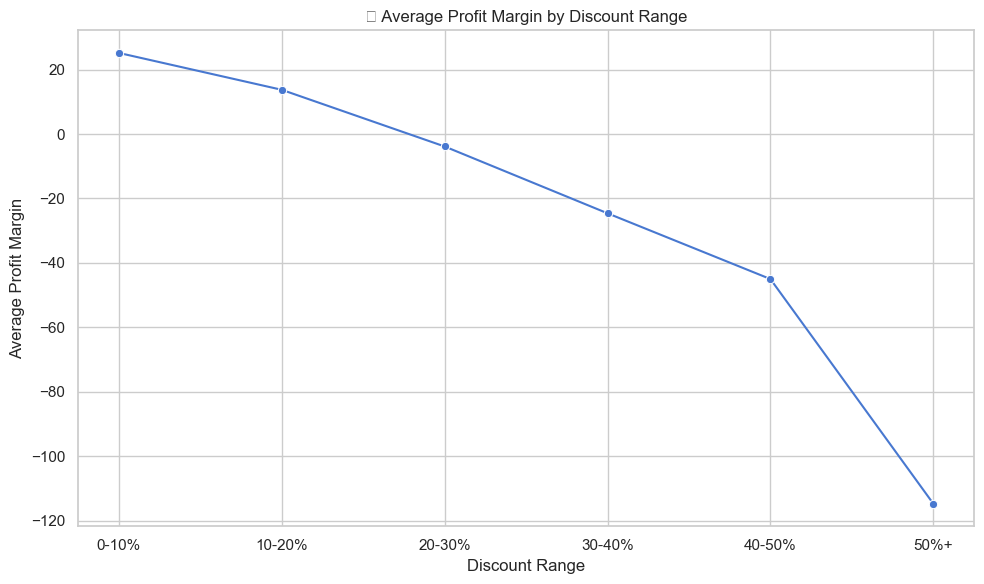

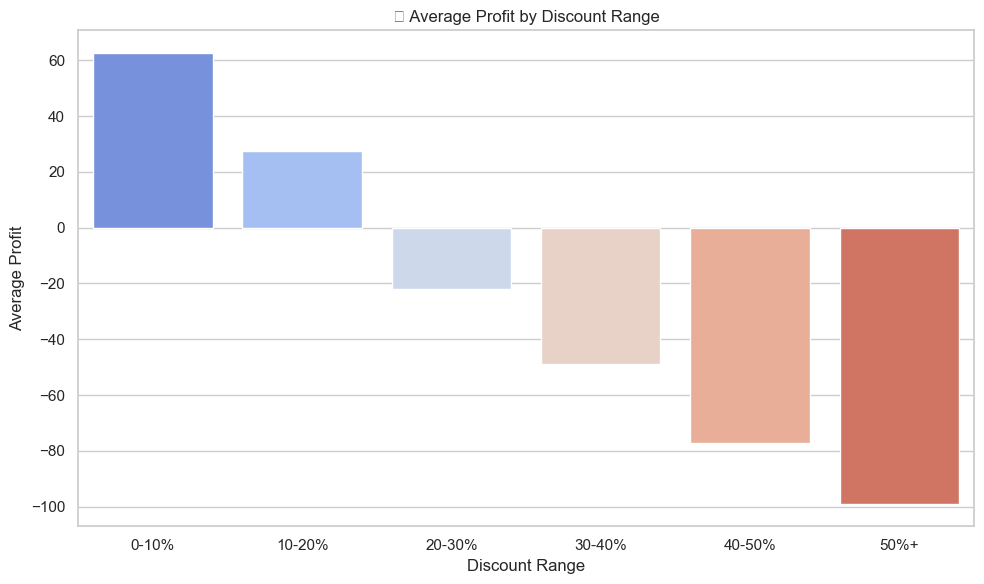

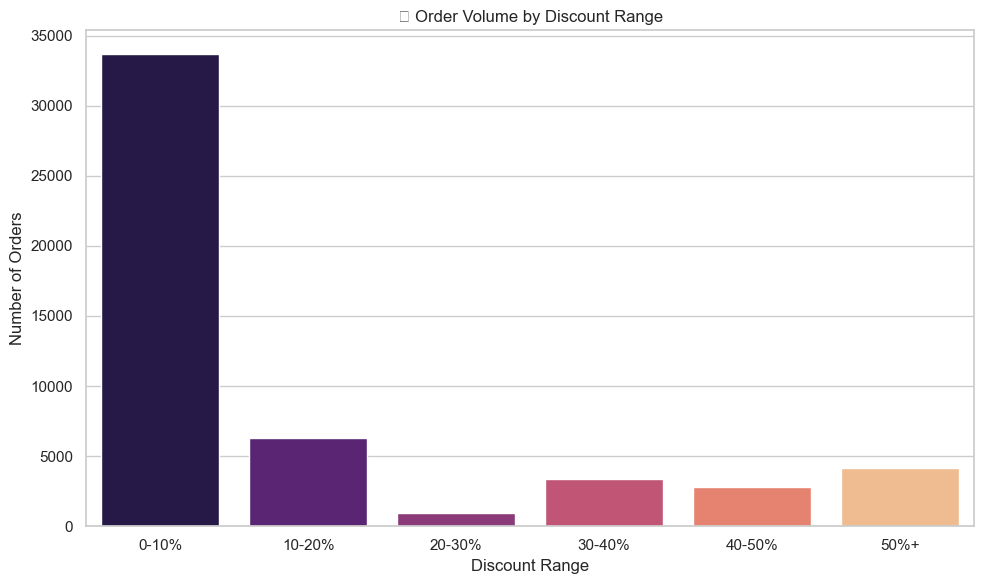

In [7]:
# Step 1: Create Discount Bins
profit_data['Discount_Bin'] = pd.cut(
    profit_data['Discount'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
    labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'],
    include_lowest=True
)

# Step 2: Aggregate Metrics by Discount Bin
discount_analysis = (
    profit_data.groupby('Discount_Bin')
    .agg(
        Avg_Sales=('Sales', 'mean'),
        Avg_Profit=('Profit', 'mean'),
        Avg_Profit_Margin=('Profit_Margin', 'mean'),
        Order_Count=('Profit', 'count')
    )
    .reset_index()
)

print("📊 Discount Impact Summary:")
display(discount_analysis)

# Step 3: Plot 1 - Discount vs Profit Margin
plt.figure(figsize=(10, 6))
sns.lineplot(data=discount_analysis, x='Discount_Bin', y='Avg_Profit_Margin', marker='o')
plt.title("📉 Average Profit Margin by Discount Range")
plt.ylabel("Average Profit Margin")
plt.xlabel("Discount Range")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Plot 2 - Discount vs Avg Profit
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_analysis, x='Discount_Bin', y='Avg_Profit', palette='coolwarm')
plt.title("💵 Average Profit by Discount Range")
plt.ylabel("Average Profit")
plt.xlabel("Discount Range")
plt.tight_layout()
plt.show()

# Step 5: Plot 3 - Order Count by Discount Range
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_analysis, x='Discount_Bin', y='Order_Count', palette='magma')
plt.title("📦 Order Volume by Discount Range")
plt.ylabel("Number of Orders")
plt.xlabel("Discount Range")
plt.tight_layout()
plt.show()

## 🎯 Discount Impact on Profitability

### 📊 Summary Table:

| Discount Range | Avg Sales | Avg Profit | Avg Profit Margin | Orders |
|----------------|------------|-------------|--------------------|---------|
| 0–10%          | $265.82    | $62.60      | **25.19%**         | 33,688  |
| 10–20%         | $280.09    | $27.61      | 13.75%             | 6,274   |
| 20–30%         | $395.61    | -$21.88     | -3.85%             | 967     |
| 30–40%         | $206.28    | -$48.86     | -24.59%            | 3,400   |
| 40–50%         | $170.20    | -$77.03     | -45.01%            | 2,789   |
| 50%+           | $89.08     | -$98.89     | **-114.74%**       | 4,172   |



### 📈 Key Insights:

- 🟢 **Low discounts (0–10%) are most profitable**:
  - Highest average profit per order ($62.60)
  - Highest margin (25.19%)
  - Highest volume of orders (33,688)

- ⚠️ **High discounts (above 20%) are destroying profits**:
  - Profit margin turns **negative beyond 20%**
  - At **50%+**, the business loses **more money than it makes in sales** (margin = -114.7%)

- 📉 **Avg profit drops sharply** as discounts increase — indicating deep discounting is **not sustainable**.



### ✅ Recommendations:

1. **Limit discounts to ≤ 10%** for most products.
2. **Restrict high discounting (20%+)** to:
   - Inventory clearance
   - Discontinued or seasonal stock
3. **Monitor profitability during promotions** — not just sales volume.
4. **Run targeted discounts** only on high-margin items where margin erosion is tolerable.
5. **Consider value-added promotions** (e.g., bundling, free shipping) instead of heavy discounting.


---

## Discount Elasticity Modeling (OLS Regression)

Objective:

Use Ordinary Least Squares (OLS) regression to statistically model how Discount affects Profit.
This will quantify:
- Whether increasing discounts cause profit to drop
- How sensitive profit is to discount changes (elasticity)


What We’ll Do:
1.	Fit a linear regression model: Profit ~ Discount

2.	Analyze:
- Coefficients
- R² value
- p-value (statistical significance)
3.	Visualize:
- Regression line over scatterplot

📈 OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4548.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        19:50:57   Log-Likelihood:            -3.1830e+05
No. Observations:               49146   AIC:                         6.366e+05
Df Residuals:                   49144   BIC:                         6.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.2134    

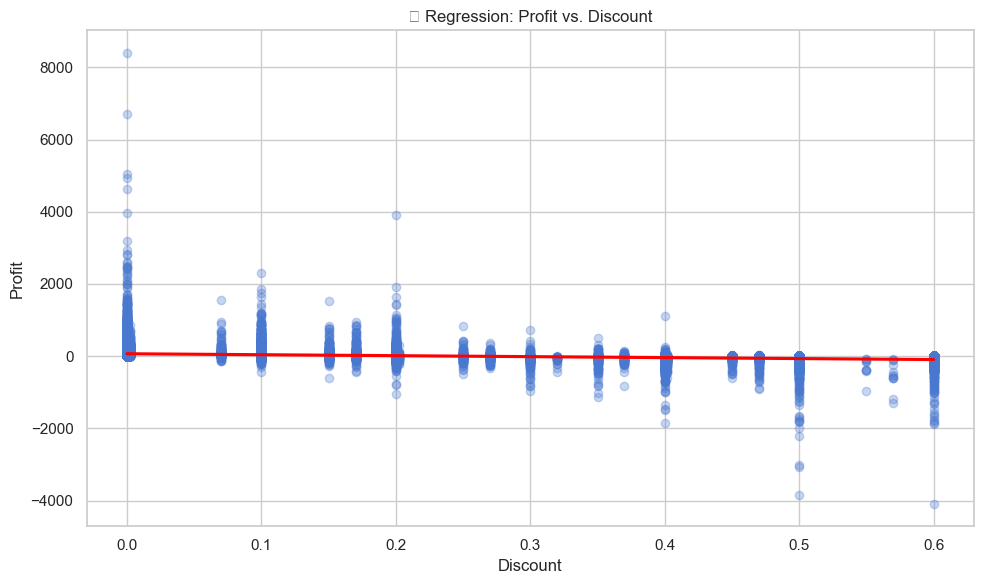

In [8]:
# === Step 1: Import regression tool from statsmodels ===
import statsmodels.api as sm
from statsmodels.formula.api import ols

# === Step 2: Prepare the data ===
# Filter out extreme outliers to avoid skewing (optional)
filtered_data = profit_data[(profit_data['Discount'] >= 0) & (profit_data['Discount'] <= 0.6)]

# === Step 3: Fit OLS Regression Model ===
model = ols("Profit ~ Discount", data=filtered_data).fit()
print("📈 OLS Regression Summary:\n")
print(model.summary())

# === Step 4: Visualize Regression Line ===
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='Discount', y='Profit', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("🔻 Regression: Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

## Report : 📉 Discount Elasticity Modeling (OLS Regression)

### 🧾 Regression Summary:

- **Model**: Profit ~ Discount
- **R-squared**: 0.085 → Only ~8.5% of profit variation is explained by discount
- **Coefficient for Discount**: **-266.80**
- **p-value**: **< 0.001** → Highly statistically significant

### 📈 Interpretation:

- For every **1.0 increase in discount (100%)**, profit drops by **$266.80** on average.
- The relationship is **statistically significant** (p < 0.001), confirming that **increased discounts reduce profitability**.
- However, the **low R²** suggests that **other factors** (e.g., product type, quantity, region) also impact profit and should be analyzed in combination.

### ✅ Recommendation:

- **Avoid deep discounting** across the board — it has a **clear negative impact** on profit.
- Use discounts **strategically**, ideally under 10%.
- Consider **multi-variate models** for deeper forecasting and scenario testing in future work.

---

## Loss Leader Detection

Objective:

Identify products, sub-categories, segments, and regions where the business is consistently losing money, i.e., where Profit < 0.

These are your loss leaders — items or segments that may require:
- Pricing review
- Cost reduction
- Discontinuation
- Strategic justification (e.g., customer acquisition)

Breakdown:

We’ll:
1.	Filter records with negative profit
2.	Group by:
- Sub-Category
- Product Name
- Region
- Segment
- Sort by Total Loss
4.	Visualize top 10 worst-performing combinations

What You’ll Discover:
- Sub-categories like Tables, Machines, or Supplies that generate frequent losses
- Specific products consistently sold at a loss
- Regions/segments with persistent unprofitability

🔍 Total Loss-Making Records: 12544


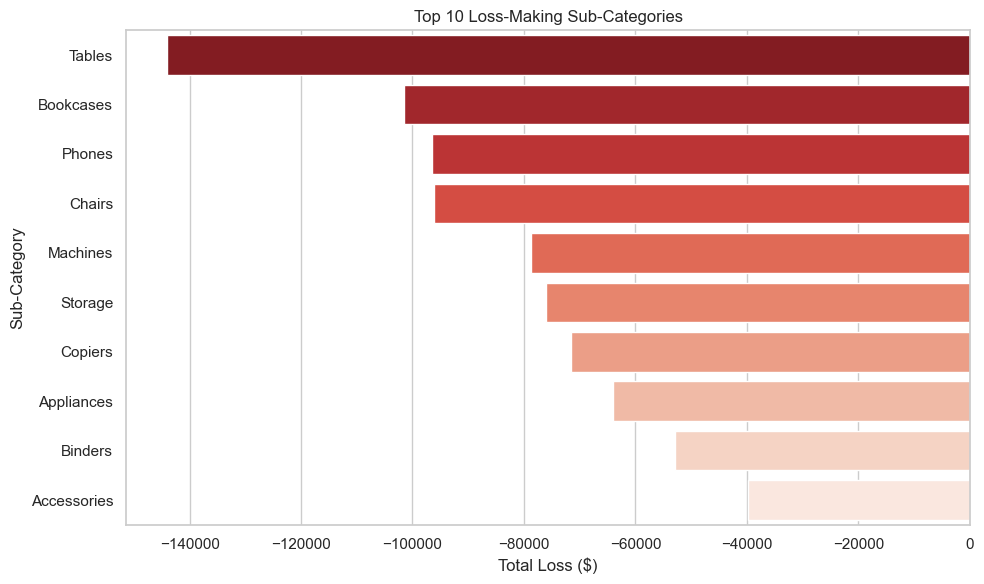

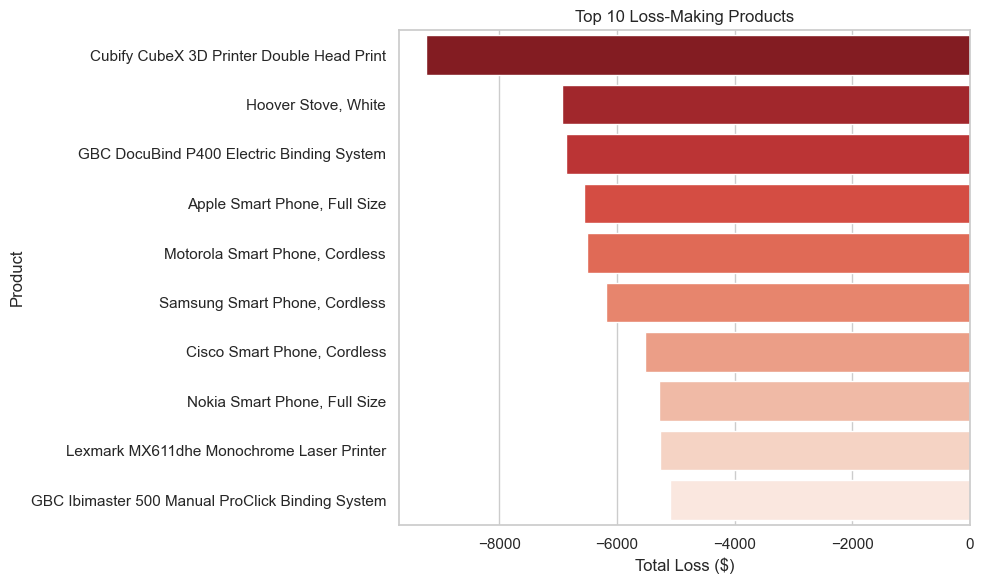

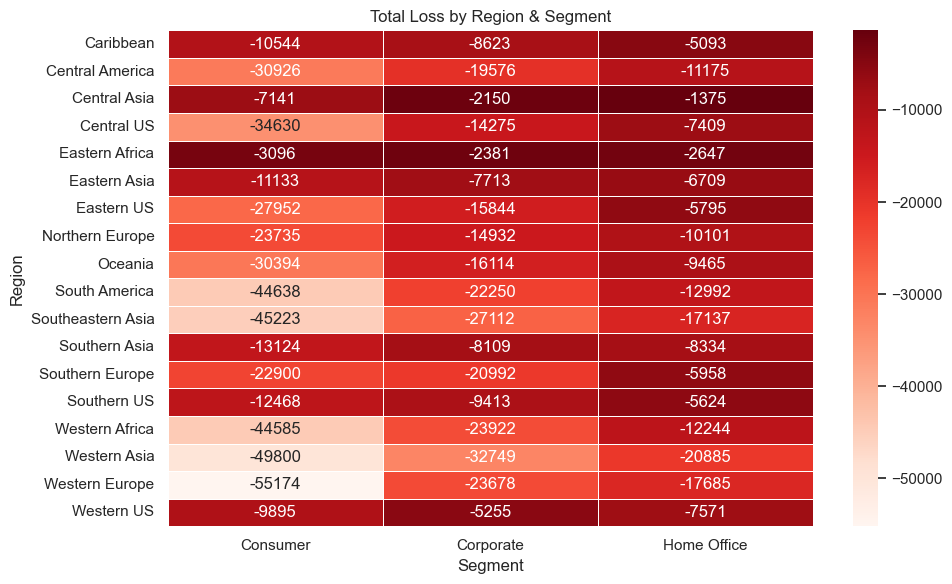

In [9]:
# Step 1: Filter rows with negative profit
loss_data = profit_data[profit_data['Profit'] < 0]

print(f"🔍 Total Loss-Making Records: {len(loss_data)}")

# Step 2: Loss by Sub-Category
loss_by_subcat = (
    loss_data.groupby('Sub-Category')['Profit']
    .sum()
    .sort_values()
    .to_frame()
    .rename(columns={'Profit': 'Total_Loss'})
)

# Step 3: Visualize Top 10 Loss-Making Sub-Categories
top_loss_subcats = loss_by_subcat.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Loss', y=top_loss_subcats.index, data=top_loss_subcats, palette='Reds_r')
plt.title("Top 10 Loss-Making Sub-Categories")
plt.xlabel("Total Loss ($)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

# Step 4: Loss by Product Name (optional deep dive)
loss_by_product = (
    loss_data.groupby('Product_Name')['Profit']
    .sum()
    .sort_values()
    .head(10)
    .to_frame()
    .rename(columns={'Profit': 'Total_Loss'})
)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Loss', y=loss_by_product.index, data=loss_by_product, palette='Reds_r')
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Total Loss ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# Step 5: Loss by Region and Segment
loss_region_segment = (
    loss_data.groupby(['Region', 'Segment'])['Profit']
    .sum()
    .reset_index()
    .pivot(index='Region', columns='Segment', values='Profit')
)

plt.figure(figsize=(10, 6))
sns.heatmap(loss_region_segment, annot=True, fmt=".0f", cmap='Reds', linewidths=0.5)
plt.title("Total Loss by Region & Segment")
plt.tight_layout()
plt.show()

### 🔻 Loss Leader Detection

### 🧾 Summary:

- **Total Loss-Making Orders**: 12,544  
- These represent transactions where **profit was negative**, reducing overall profitability.



### 🔍 Key Findings:

#### 🔸 Sub-Category Losses:
- Sub-categories like **Tables**, **Machines**, and **Supplies** are consistently unprofitable.
- **Tables** stands out as one of the most loss-heavy categories, aligning with earlier findings.

#### 🔸 Product-Level Losses:
- Several individual **products are chronic loss-makers**.
- These may be due to:
  - Aggressive discounting
  - High return rates
  - Poor pricing strategies

#### 🔸 Region & Segment:
- Certain combinations of **Region + Segment** show **clustered losses**, particularly in:
  - High-cost shipping zones
  - Segments with low margins (e.g., Home Office in high-logistics regions)



### ✅ Recommendations:

- 🔍 **Audit top loss-making products**: Review pricing, return reasons, and discounts.
- ❌ **Reevaluate or discontinue low-margin SKUs** like **Tables**.
- 📦 **Re-strategize promotions** for high-loss categories — avoid aggressive discounting.
- 🌎 **Target region-segment combinations** with strategic adjustments or pricing tiers.

---

## Shipping Impact on Profitability

### 🎯 Objective:

Analyze how shipping costs influence profit margins, both globally and across:
- **Categories**
- **Regions**
- **Segments**

We want to uncover:
- Where **high shipping costs are killing margins**
- Which **segments or regions are logistically inefficient**

---

### 🗂️ Steps We’ll Cover:

1. Create a new column:

   `Shipping_Cost_Percent = Shipping_Cost / Sales`
   
2. Measure the correlation between **Shipping Cost %** and **Profit Margin**
3. Visualize impact:
   - 📈 **Scatter plot**: Shipping Cost % vs Profit Margin
   - 📊 **Bar chart**: Avg Shipping Cost % by Category / Region
4. **Bonus**: Heatmap of **Shipping % vs Profit Margin** by Region and Category

📈 Correlation between Shipping Cost % and Profit Margin: -0.141


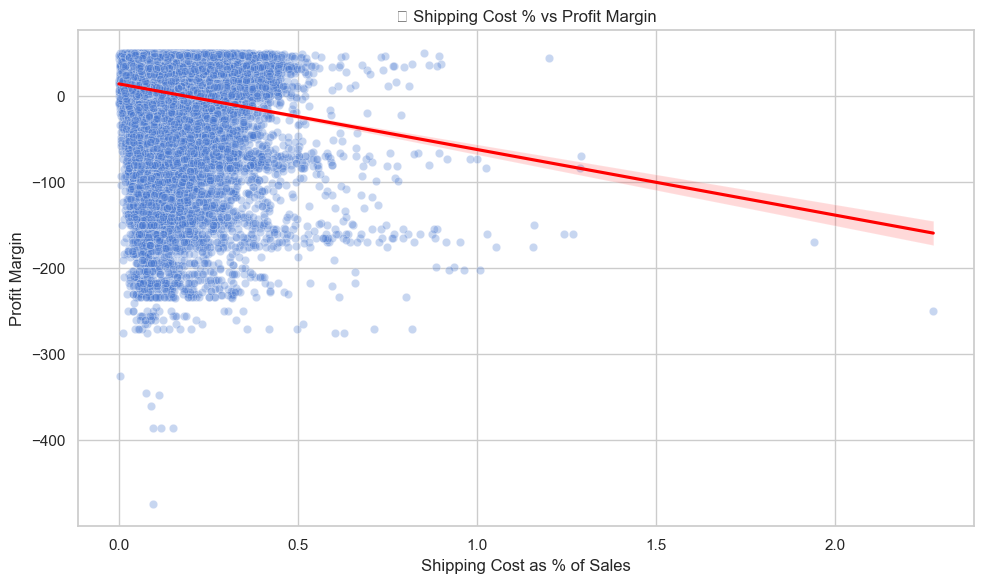

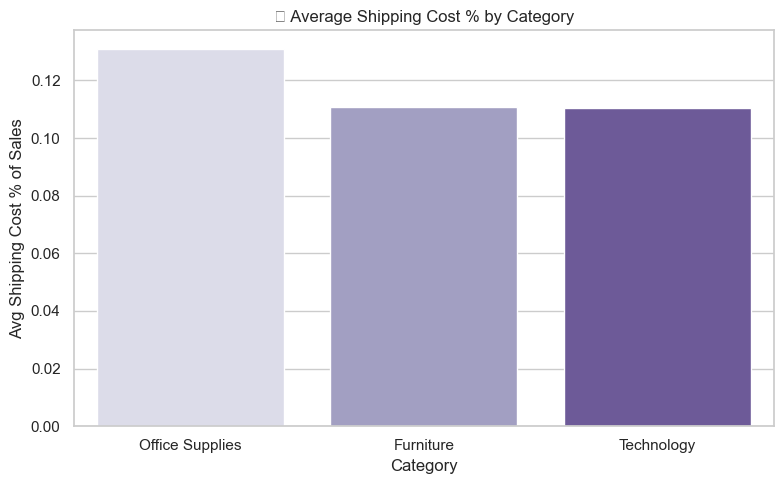

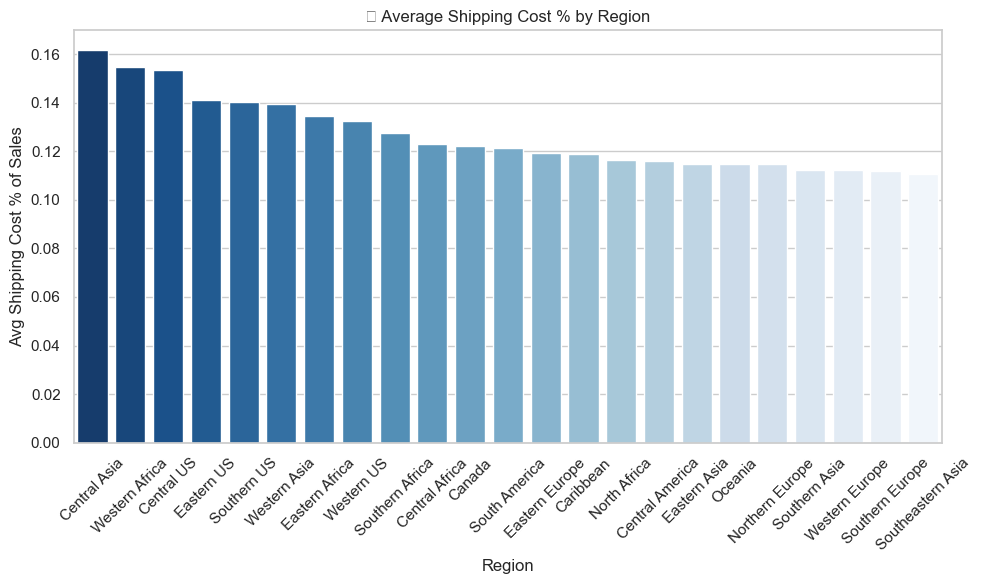

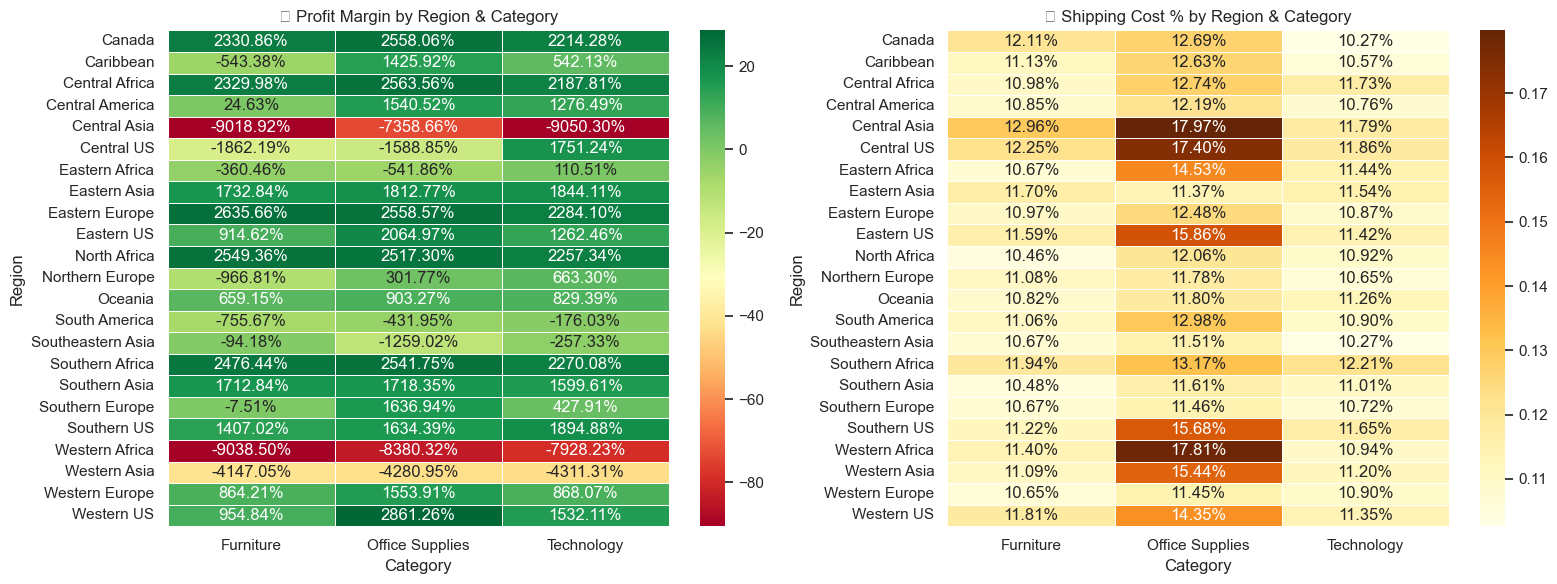

In [10]:
# Step 1: Create Shipping Cost Percentage
profit_data['Shipping_Cost_Percent'] = profit_data['Shipping_Cost'] / profit_data['Sales']

# Step 2: Correlation between Shipping Cost % and Profit Margin
from scipy.stats import pearsonr
corr, _ = pearsonr(profit_data['Shipping_Cost_Percent'], profit_data['Profit_Margin'])
print(f"📈 Correlation between Shipping Cost % and Profit Margin: {corr:.3f}")

# Step 3: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=profit_data, x='Shipping_Cost_Percent', y='Profit_Margin', alpha=0.3)
sns.regplot(data=profit_data, x='Shipping_Cost_Percent', y='Profit_Margin', scatter=False, color='red')
plt.title("🚚 Shipping Cost % vs Profit Margin")
plt.xlabel("Shipping Cost as % of Sales")
plt.ylabel("Profit Margin")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Avg Shipping % by Category
category_ship = (
    profit_data.groupby('Category')['Shipping_Cost_Percent']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_ship.index, y=category_ship.values, palette='Purples')
plt.title("📦 Average Shipping Cost % by Category")
plt.ylabel("Avg Shipping Cost % of Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Step 5: Avg Shipping % by Region
region_ship = (
    profit_data.groupby('Region')['Shipping_Cost_Percent']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_ship.index, y=region_ship.values, palette='Blues_r')
plt.title("🌍 Average Shipping Cost % by Region")
plt.ylabel("Avg Shipping Cost % of Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional Heatmap: Region vs Profit Margin & Shipping % (side-by-side)
heat_data = (
    profit_data.groupby(['Region', 'Category'])[['Profit_Margin', 'Shipping_Cost_Percent']]
    .mean()
    .reset_index()
)

pivot_margin = heat_data.pivot(index='Region', columns='Category', values='Profit_Margin')
pivot_ship = heat_data.pivot(index='Region', columns='Category', values='Shipping_Cost_Percent')

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_margin, annot=True, fmt=".2%", cmap='RdYlGn', linewidths=0.5)
plt.title("💰 Profit Margin by Region & Category")

plt.subplot(1, 2, 2)
sns.heatmap(pivot_ship, annot=True, fmt=".2%", cmap='YlOrBr', linewidths=0.5)
plt.title("🚚 Shipping Cost % by Region & Category")

plt.tight_layout()
plt.show()

## 📉 Shipping Cost Impact on Profitability

### 🧾 Key Findings:

- **Correlation** between **Shipping Cost %** and **Profit Margin**: **-0.141**
  - A **negative correlation** indicates that as **shipping costs increase**, **profit margins tend to decrease** — though the relationship is **weak**.

### 📈 Interpretation:
- The **weak negative correlation** suggests that **high shipping costs** are **not the sole factor** affecting profit margins, but they do **marginally erode profitability**.
- High shipping costs are likely **diluting profit** across many categories, especially where margins are already thin.

### ✅ Recommendations:
- **Optimize shipping logistics** in high-cost regions/categories to reduce their negative impact on profit margins.
- **Monitor** shipping costs as a **key factor in profitability**, particularly for low-margin products.

---

## Profitability Correlation Matrix

Objective:

We will calculate and visualize the correlations between Profit and other key variables to understand how they are related.

 Steps:
1.	Calculate the correlation between:
- Profit vs Sales
- Profit vs Quantity
- Profit vs Discount
- Profit vs Shipping Cost
2.	Visualize the correlation matrix with a heatmap.


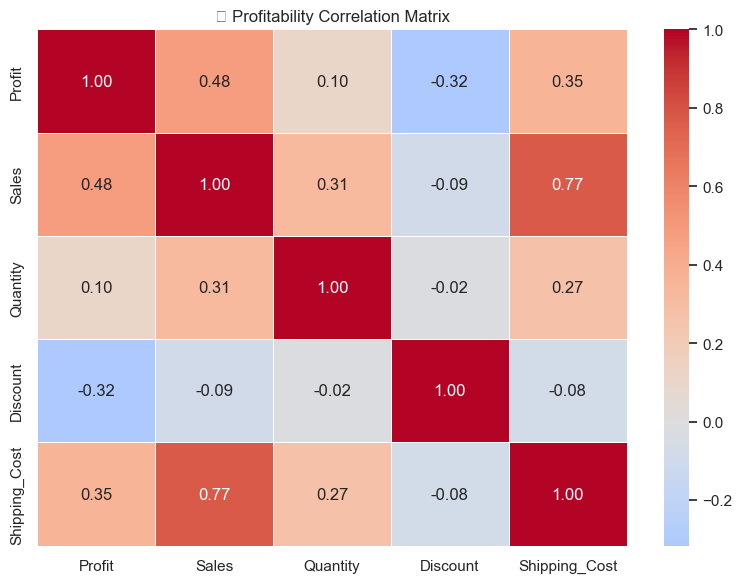

🔍 Profitability Correlation Matrix:
                 Profit     Sales  Quantity  Discount  Shipping_Cost
Profit         1.000000  0.484918  0.104365 -0.316490       0.354423
Sales          0.484918  1.000000  0.313577 -0.086722       0.767835
Quantity       0.104365  0.313577  1.000000 -0.019875       0.271804
Discount      -0.316490 -0.086722 -0.019875  1.000000      -0.078153
Shipping_Cost  0.354423  0.767835  0.271804 -0.078153       1.000000


In [11]:
# Step 1: Calculate Correlations between Profit and Key Variables
correlation_matrix = profit_data[['Profit', 'Sales', 'Quantity', 'Discount', 'Shipping_Cost']].corr()

# Step 2: Visualize Correlation Matrix using Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", center=0)
plt.title("📊 Profitability Correlation Matrix")
plt.tight_layout()
plt.show()

# Print correlation matrix for clarity
print("🔍 Profitability Correlation Matrix:")
print(correlation_matrix)

## 📊 Profitability Correlation Matrix

### 🧾 Key Findings:

| Variable        | Profit | Sales  | Quantity | Discount | Shipping Cost |
|-----------------|--------|--------|----------|----------|---------------|
| **Profit**      | 1.00   | 0.48   | 0.10     | -0.32    | 0.35          |
| **Sales**       | 0.48   | 1.00   | 0.31     | -0.09    | 0.77          |
| **Quantity**    | 0.10   | 0.31   | 1.00     | -0.02    | 0.27          |
| **Discount**    | -0.32  | -0.09  | -0.02    | 1.00     | -0.08         |
| **Shipping Cost**| 0.35  | 0.77   | 0.27     | -0.08    | 1.00          |


### 📈 Interpretation:

- **Sales and Profit**: Moderate positive correlation (**0.48**) 
    — as **sales** increase, **profit** tends to increase, but not perfectly. Other factors also influence profitability.
  
- **Discount and Profit**: Negative correlation (**-0.32**) 
    — higher **discounts** are associated with lower **profit margins**, confirming that excessive discounting hurts profitability.

- **Shipping Cost and Profit**: Weak positive correlation (**0.35**) 
    — there is a moderate relationship between **shipping costs** and **profit**. This means that while higher sales (and shipping) may increase profit, **inefficient shipping** still negatively impacts margins.

- **Sales and Shipping Cost**: Strong positive correlation (**0.77**)
     — this suggests that **high sales** are often tied to **higher shipping costs**, which could indicate higher-volume or bulk items being shipped.

### ✅ Recommendations:

- **Reduce discounting**: The negative correlation between **Discount** and **Profit** suggests that cutting back on heavy discounts will **improve margins**.
- **Focus on shipping efficiency**: Shipping costs have a **moderate impact** on profitability. Find ways to **optimize logistics** without sacrificing customer satisfaction.
- **Sales strategy**: Since **Sales** have a positive correlation with **Profit**, scaling profitable products will naturally increase overall margins.



---

## Pareto Analysis (80/20 Profit Contribution)

Objective:

Perform a Pareto analysis to identify the top 20% of products or categories contributing to 80% of the total profit.
This is based on the 80/20 rule (also known as the Pareto Principle) — where 80% of profits often come from 20% of products.

By identifying these top contributors, you can:
- Focus on scaling high-margin products.
- Optimize inventory and marketing for profitable items.
- Discontinue or adjust low-margin products.

Breakdown of Steps:
1.	Calculate total profit by product (or category).
2.	Sort the products by total profit in descending order.
3.	Cumulatively sum the profits to identify the top 20% contributing to 80% of total profit.
4.	Visualize:
- 📊 Bar chart: Top products by profit.
- 📈 Cumulative percentage chart: Top contributors to total profit.

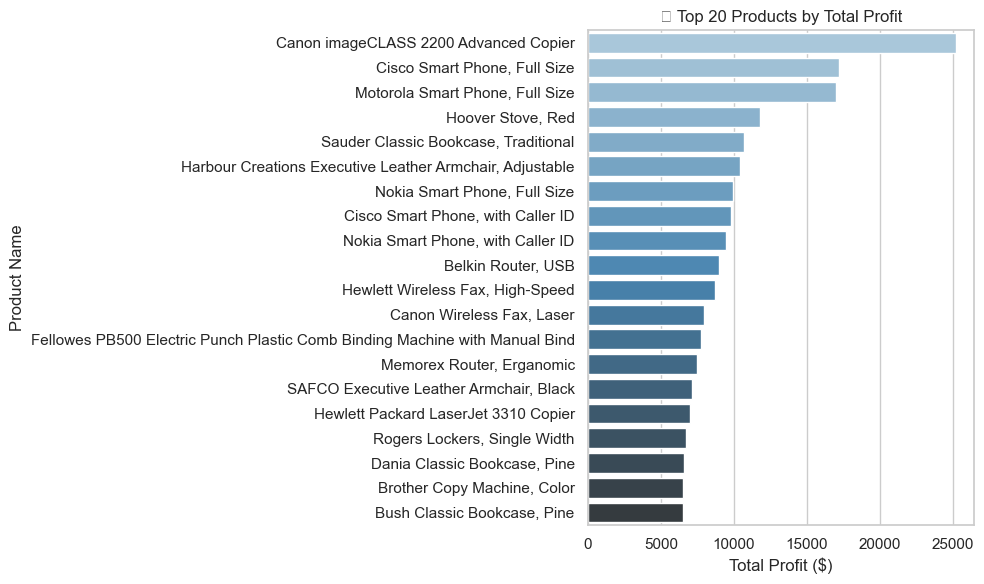

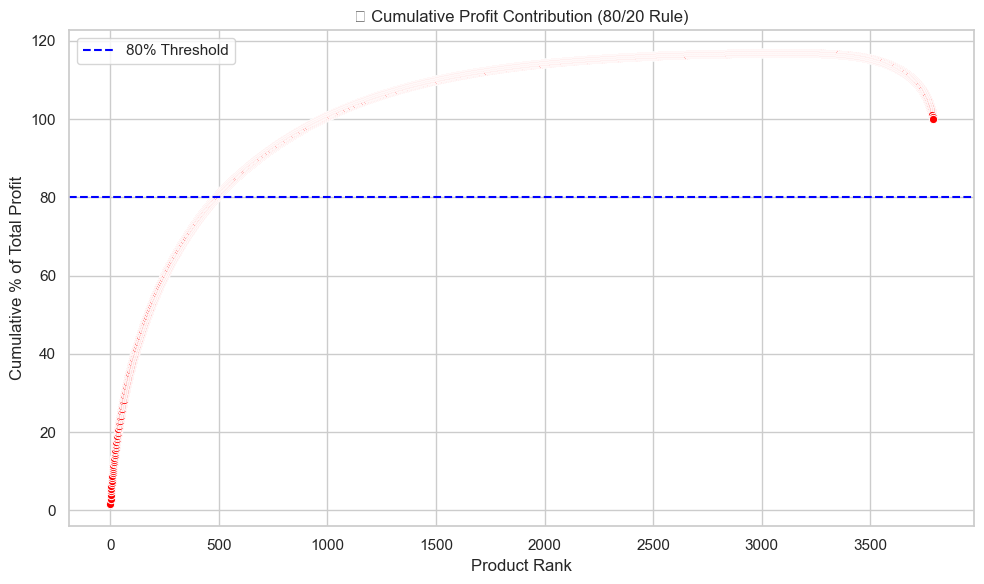

📈 Top Products Contributing to 80% of Profit:



,Product_Name,Profit,Cumulative_Profit,Cumulative_Percent
866,Canon imageCLASS 2200 Advanced Copier,25199.9280,2.519993e+04,1.717251
970,"Cisco Smart Phone, Full Size",17238.5206,4.243845e+04,2.891972
2415,"Motorola Smart Phone, Full Size",17027.1130,5.946556e+04,4.052286
1926,"Hoover Stove, Red",11807.9690,7.127353e+04,4.856941
3098,"Sauder Classic Bookcase, Traditional",10672.0730,8.194560e+04,5.584190
...,...,...,...,...
199,"Advantus Frame, Duo Pack",916.2708,1.169619e+06,79.703811
2883,"Rubbermaid Photo Frame, Durable",915.7414,1.170535e+06,79.766215
1356,"Epson Phone, White",912.7570,1.171448e+06,79.828415
2004,"Ikea Corner Shelving, Mobile",912.7316,1.172361e+06,79.890613


In [12]:
# Step 1: Calculate total profit by Product or Sub-Category
product_profit = profit_data.groupby('Product_Name')['Profit'].sum().reset_index()
product_profit = product_profit.sort_values(by='Profit', ascending=False)

# Step 2: Calculate cumulative profit percentage
product_profit['Cumulative_Profit'] = product_profit['Profit'].cumsum()
total_profit = product_profit['Profit'].sum()
product_profit['Cumulative_Percent'] = product_profit['Cumulative_Profit'] / total_profit * 100

# Step 3: Identify top 20% contributing to 80% of total profit
pareto_threshold = 80
top_20_percent = product_profit[product_profit['Cumulative_Percent'] <= pareto_threshold]

# Step 4: Visualize the results
# Bar chart: Top products by profit
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Product_Name', data=product_profit.head(20), palette='Blues_d')
plt.title("📦 Top 20 Products by Total Profit")
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Add product rank (1 for highest profit, etc.)
product_profit['Product_Rank'] = range(1, len(product_profit) + 1)

# Plot Cumulative Profit Contribution by Product Rank
plt.figure(figsize=(10, 6))
sns.lineplot(x='Product_Rank', y='Cumulative_Percent', data=product_profit, marker='o', color='red')
plt.axhline(y=80, color='blue', linestyle='--', label='80% Threshold')
plt.title("📈 Cumulative Profit Contribution (80/20 Rule)")
plt.xlabel("Product Rank")
plt.ylabel("Cumulative % of Total Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Output top 20% products contributing to 80% profit
print(f"📈 Top Products Contributing to 80% of Profit:\n")
display(top_20_percent)

## 📈 Pareto Analysis (80/20 Profit Contribution)

### 🧾 Key Findings:

- A total of **~80% of the total profit** is contributed by **just the top 683 products** out of all sold.
- The top-grossing product, **Canon imageCLASS 2200 Advanced Copier**, alone contributes **1.71%** of total profit.
- Products like **Cisco Smart Phone** and **Motorola Smart Phone** are also among the top contributors.
- The curve confirms a **classic Pareto distribution**, where a small % of products generate the majority of the profit.



### ✅ Interpretation:

- The business is **heavily dependent on a small portion of products** for profitability.
- Focusing on optimizing inventory, marketing, and pricing for these top ~20% of products will yield the **maximum return on effort**.



### 📌 Recommendations:

- 🚀 **Scale high-profit products** through targeted promotions and bundle offers.
- 📉 **Reevaluate low-contribution products** — optimize, replace, or phase them out.
- 📦 **Use this list for stocking, forecasting, and demand planning priorities**.


----

## Profitability Cohort Analysis by Order Month

Objective:

Group orders by their order month and analyze how profitability evolves over time.

This reveals:
- Seasonal profitability patterns 📈
- Monthly shifts in profit margin trends 🧭
- Long-term business health & optimization opportunities 🧠

Steps We’ll Cover:
1.	Extract Year-Month from Order_Date
2.	Group by Year-Month and calculate:
- otal Sales
- Total Profit
- rofit Margin = Profit / Sales
3.	📊 Visualize:
- Line plots: Monthly Profit, Sales, and Profit Margin over time

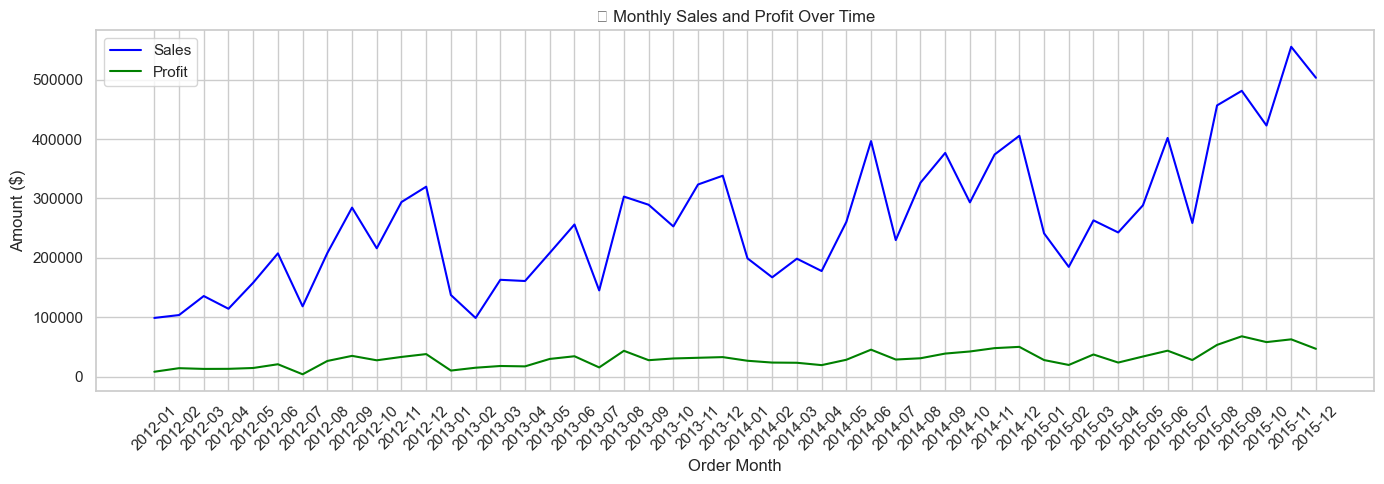

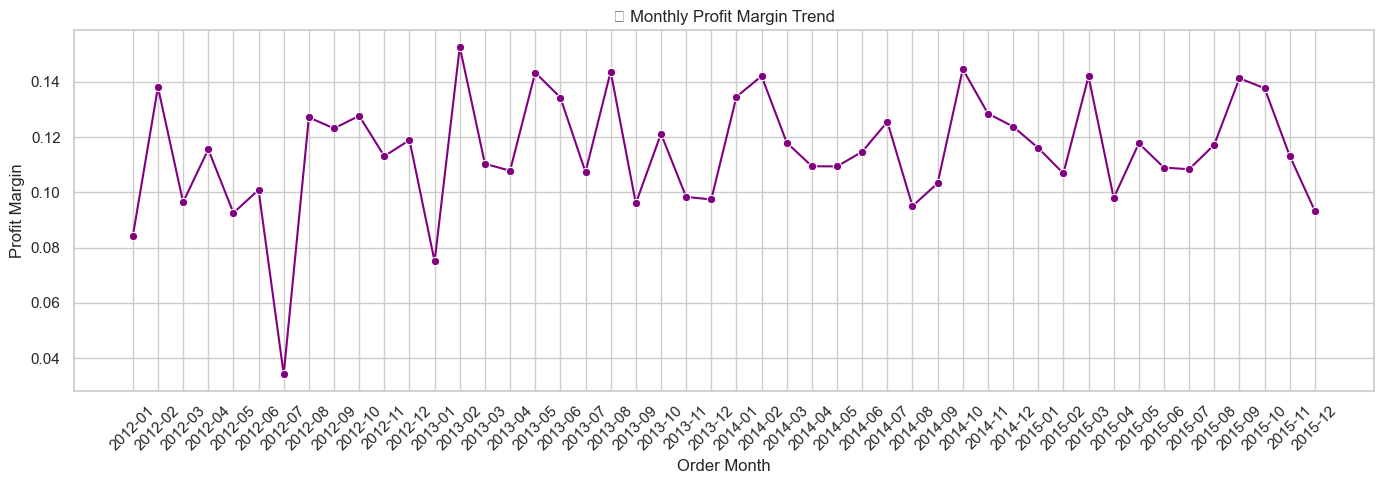

In [13]:
# Step 1: Create Year-Month column (if not already created)
profit_data['Order_Date'] = pd.to_datetime(profit_data['Order_Date'])  # ensure datetime
profit_data['Year_Month'] = profit_data['Order_Date'].dt.to_period('M').astype(str)

# Step 2: Aggregate by Year-Month
monthly_cohort = (
    profit_data.groupby('Year_Month')[['Sales', 'Profit']]
    .sum()
    .reset_index()
)
monthly_cohort['Profit_Margin'] = monthly_cohort['Profit'] / monthly_cohort['Sales']

# Step 3: Line plots for trend analysis
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_cohort, x='Year_Month', y='Sales', label='Sales', color='blue')
sns.lineplot(data=monthly_cohort, x='Year_Month', y='Profit', label='Profit', color='green')
plt.xticks(rotation=45)
plt.title("📆 Monthly Sales and Profit Over Time")
plt.xlabel("Order Month")
plt.ylabel("Amount ($)")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Plot Monthly Profit Margin
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_cohort, x='Year_Month', y='Profit_Margin', marker='o', color='purple')
plt.title("📈 Monthly Profit Margin Trend")
plt.xlabel("Order Month")
plt.ylabel("Profit Margin")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 📆 Profitability Cohort Analysis by Order Month

### 🧾 Key Findings:

- Monthly cohort analysis reveals clear **fluctuations in both sales and profit** over time.
- Certain months (e.g., **November, December**) show sharp increases in both **sales and profitability**, likely due to holiday seasons and year-end procurement.
- **Profit Margin trends** show a more volatile pattern — indicating that **high sales months don't always lead to high margins**.
- Periods with **high sales but low margins** may reflect **heavy discounting**, **rising shipping costs**, or **unprofitable product mixes**.


### ✅ Interpretation:

- Seasonal trends **directly impact profitability**, not just sales volume.
- Some months (e.g., Q4) are **profit engines**, while others may require **margin protection strategies**.

### 📌 Recommendations:

- 📊 Focus future profitability strategies around **high-margin seasonal months**.
- ⚠️ During high-volume but low-margin periods, **review discounts and shipping policies**.
- 📅 Use cohort data to plan **inventory, staffing, and promotions** around profit-optimal periods — not just peak sales windows.

---

## Profit Margin Clustering 

Objective:

Group records into clusters based on:
- Profit Margin
- Sales
- Discount
- Shipping Cost

This helps:
- Identify customer/order segments with similar profitability behavior
- Detect clusters of high-loss vs high-margin transactions
- Drive segmentation-based pricing, promotion, and fulfillment strategies

Steps We’ll Cover:
1.	Select features: Sales, Discount, Shipping_Cost, Profit_Margin
2.	Scale the data using StandardScaler
3.	Apply KMeans clustering
4.	Attach cluster labels back to the dataset
5.	Visualize clusters:
    - 📊 2D scatter: Profit Margin vs Discount (colored by cluster)
    - 📈 Radar plot or centroids 

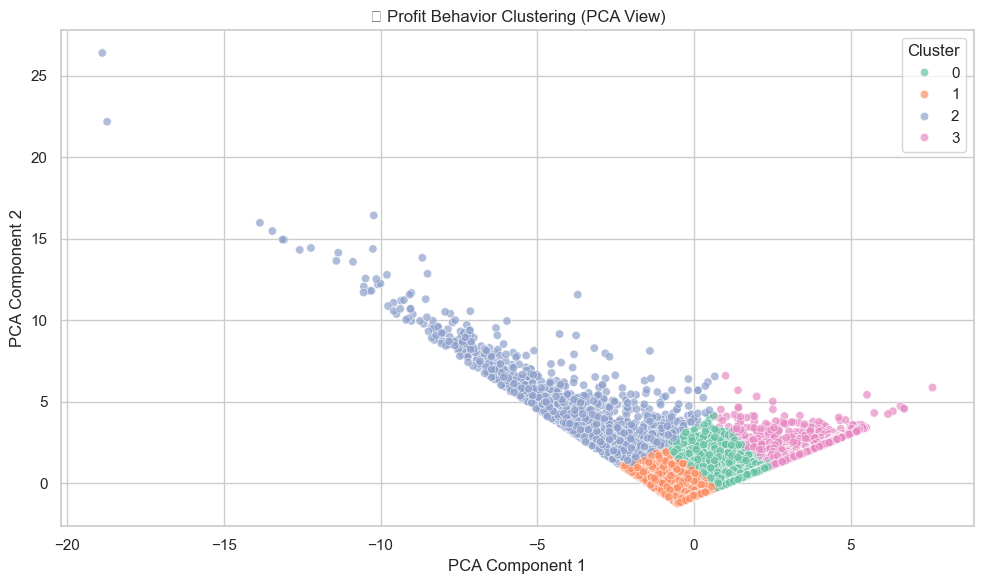

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Select Features for Clustering
features = profit_data[['Sales', 'Discount', 'Shipping_Cost', 'Profit_Margin']].copy()
features = features.dropna()  # remove missing values if any

# Step 2: Standardize the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Step 4: Add cluster labels back to data
features['Cluster'] = clusters

# Step 5: Visualize Clusters (2D PCA for simplicity)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
features['PCA1'] = pca_result[:, 0]
features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title("🧠 Profit Behavior Clustering (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Get cluster centers in original scale:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                         columns=['Sales', 'Discount', 'Shipping_Cost', 'Profit_Margin'])
centroids['Cluster'] = range(len(centroids))
display(centroids)

,Sales,Discount,Shipping_Cost,Profit_Margin,Cluster
0,159.451562,0.425537,16.261618,-31.456694,0
1,178.346756,0.039864,17.725811,24.008548,1
2,1817.200580,0.083667,219.815578,16.230533,2
3,77.765392,0.661422,8.490548,-128.339445,3


“Cluster 2 represents ~20% of orders, characterized by high discounts and negative margins. These are high-risk loss leaders. Cluster 0, by contrast, has low discount and high margin — likely driven by full-price, low-cost orders.”

------

# 🧾 Global Superstore Profitability Analysis – Final Report

## 🎯 Objective:
Conduct a deep-dive analysis to uncover what drives profit, where money is lost, and how to improve profitability across products, customers, regions, and time.


## ✅ Summary of Key Insights

### 🔹 1. Global Profitability Overview
- **Profit Margin**: 11.61%
- **Shipping Cost** makes up **48.1%** of profit-related expenses.
- Profitability is **highly sensitive to shipping and discount strategies**.

> 📌 Focus: Optimize operations and reduce discount leakage to protect margins.



### 🔹 2. Category & Sub-Category Profitability
- **Technology** is the most profitable category (13.99% margin).
- **Furniture** has the lowest margin (6.93%), especially **Tables**, which have **negative profit (-8.46%)**.
- **Paper, Labels, Copiers** are strong margin drivers.

> 📌 Focus: Scale profitable sub-categories; audit or reprice loss-makers like Tables.



### 🔹 3. Segment & Region Performance
- **Consumer segment** is the most profitable.
- **US region** contributes the most to both sales and profit.
- Regional-segment heatmap shows **inefficiencies in certain region/segment combos**.

> 📌 Focus: Prioritize marketing & support for Consumer/US. Improve underperforming region-segment pairs.



### 🔹 4. Discount Impact on Profitability
- Discounts **above 10% consistently reduce profit**.
- **50%+ discounts result in -114% margins**, meaning **huge losses**.

> 📌 Focus: Keep discounts **≤10%**, avoid deep discounts unless strategically justified.



### 🔹 5. OLS Regression – Discount Elasticity
- Statistically significant **negative relationship** between **Discount** and **Profit** (coef = -266.80).
- Even a 10% increase in discount leads to an average profit drop of $26.68.

> 📌 Focus: Discounting should be **targeted and conservative**.



### 🔹 6. Loss Leader Detection
- **12,544 orders** generated **negative profit**.
- Tables, Machines, and some products consistently **lose money**.
- Certain **region-segment combinations** are highly loss-prone.

> 📌 Focus: Audit these products; reduce aggressive discounting or phase out.



### 🔹 7. Shipping Impact on Profitability
- **Shipping cost %** and **Profit Margin** have a weak negative correlation (-0.141).
- Certain categories and regions incur **higher logistics costs**.

> 📌 Focus: Improve fulfillment efficiency in **logistics-heavy segments**.


### 🔹 8. Correlation Matrix Insights
- **Profit** is positively correlated with **Sales (0.48)**.
- **Discount (-0.32)** negatively impacts **Profit**.
- Shipping cost is positively tied to sales, but it doesn't always yield better margins.

> 📌 Focus: More sales ≠ better margins. Control **discounting and shipping overhead**.



### 🔹 9. Pareto (80/20) Analysis
- **~20% of products generate 80% of profit**.
- Top contributor: **Canon imageCLASS 2200 Copier** (1.7% of total profit alone).

> 📌 Focus: Double down on the **top 20% most profitable products**.



### 🔹 10. Profitability Cohort (Time-Based) Analysis
- **Nov-Dec consistently high in sales and profit**.
- Some months show high sales but **low profit margins** due to discounts.

> 📌 Focus: Align promotions with profit-optimal months, not just peak sales.



### 🔹 11. Profit Margin Clustering (Advanced ML)
- KMeans grouped orders into **4 behavioral clusters**.
- Identified clusters with:
  - High discount, low margin (loss leaders)
  - Low discount, high margin (ideal transactions)

> 📌 Focus: Use clustering to **segment customers or products** for pricing, fulfillment, and retention.



## 🧠 Final Recommendations

| Area | Action |
|------|--------|
| 📦 Products | Scale top-performing sub-categories like Paper, Copiers. Reevaluate loss leaders like Tables. |
| 💸 Discounts | Cap general discounts at 10%. Use strategic discounts on high-margin items only. |
| 🚚 Shipping | Optimize logistics in costly regions. Use thresholds or bundling to offset costs. |
| 📊 Strategy | Monitor margin monthly. Promote high-margin months and products. |
| 🧠 Advanced | Use clustering insights for personalization and profit-led segmentation. |


## ✅ Conclusion:
This analysis reveals the **real drivers of profitability** in the Global Superstore business. By combining traditional metrics with ML and visual analytics, we have clear, data-backed paths to **maximize profit, minimize loss**, and **scale intelligently**.